<a href="https://colab.research.google.com/github/MohitKumar1004/Real-Estate-Price-Prediction/blob/main/Real_State_Price_Prediction_(Data_Science_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Real State Price Prediction***
Domain: Real Estate

Difficulty: Easy to Medium

Challenges:

Missing value treatment
Outlier treatment
Understanding which variables drive the price of homes in Boston
Summary:
The Boston housing dataset contains 506 observations and 14 variables. The dataset contains missing values.

# Importing Libraries

In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error ,confusion_matrix
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# Linear Regression
from sklearn.linear_model import LinearRegression
# Decision Tree
from sklearn.tree import DecisionTreeRegressor,plot_tree
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Problem Statement


*   You have been given a dataset that describes the house in Bosten.Now ,based on the given features ,you have to predict the house price.


# Creating a Dataframe

In [590]:
boston = load_boston()
df = pd.DataFrame(boston.data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# EDA - Exploratory Data Analysis

In [591]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


*   Adding columns

In [592]:
df.columns = boston.feature_names

In [593]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Columns Informations
*   CRIM per capita crime rate by town
*   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS proportion of non-retail buisiness acres per town
*   CHAS Charles River dummy variable (=1 if tractor bounds river; 0 otherwise)
*   NOX nitric oxides concentration (parts per 10 million)
*   RM average number of rooms per dwelling
*   AGE proportion of owner-occupied units built prior to 1940
*   DIS weighted distances to five Boston employment centres
*   RAD index of accessibility to radial highways
*   TAX full-value property-tax rate per 10,000usd
*   PTRATIO pupil-teacher ratio by town
*   B 1000(Bk-0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT % lower status of the population

# Adding the target column into DataFrame

In [594]:
df['PRICE'] = boston.target

In [595]:
df['CHAS']=df['CHAS'].astype(object)

In [596]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [597]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [598]:
df.shape

(506, 14)

In [599]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [600]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS        object
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [601]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [602]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [603]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [604]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [605]:
df.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


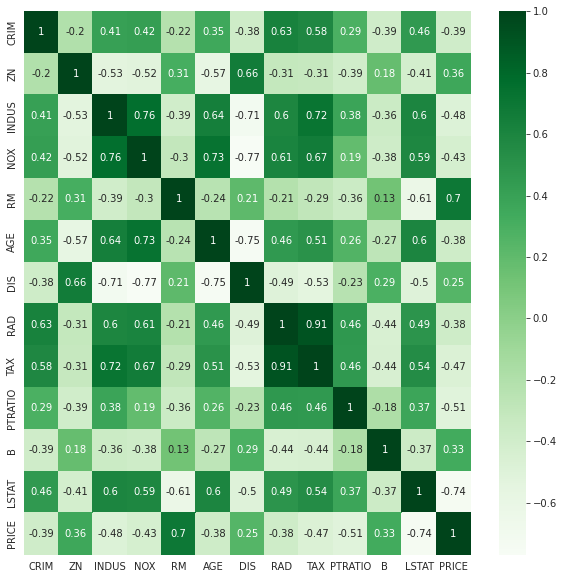

In [606]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='Greens')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


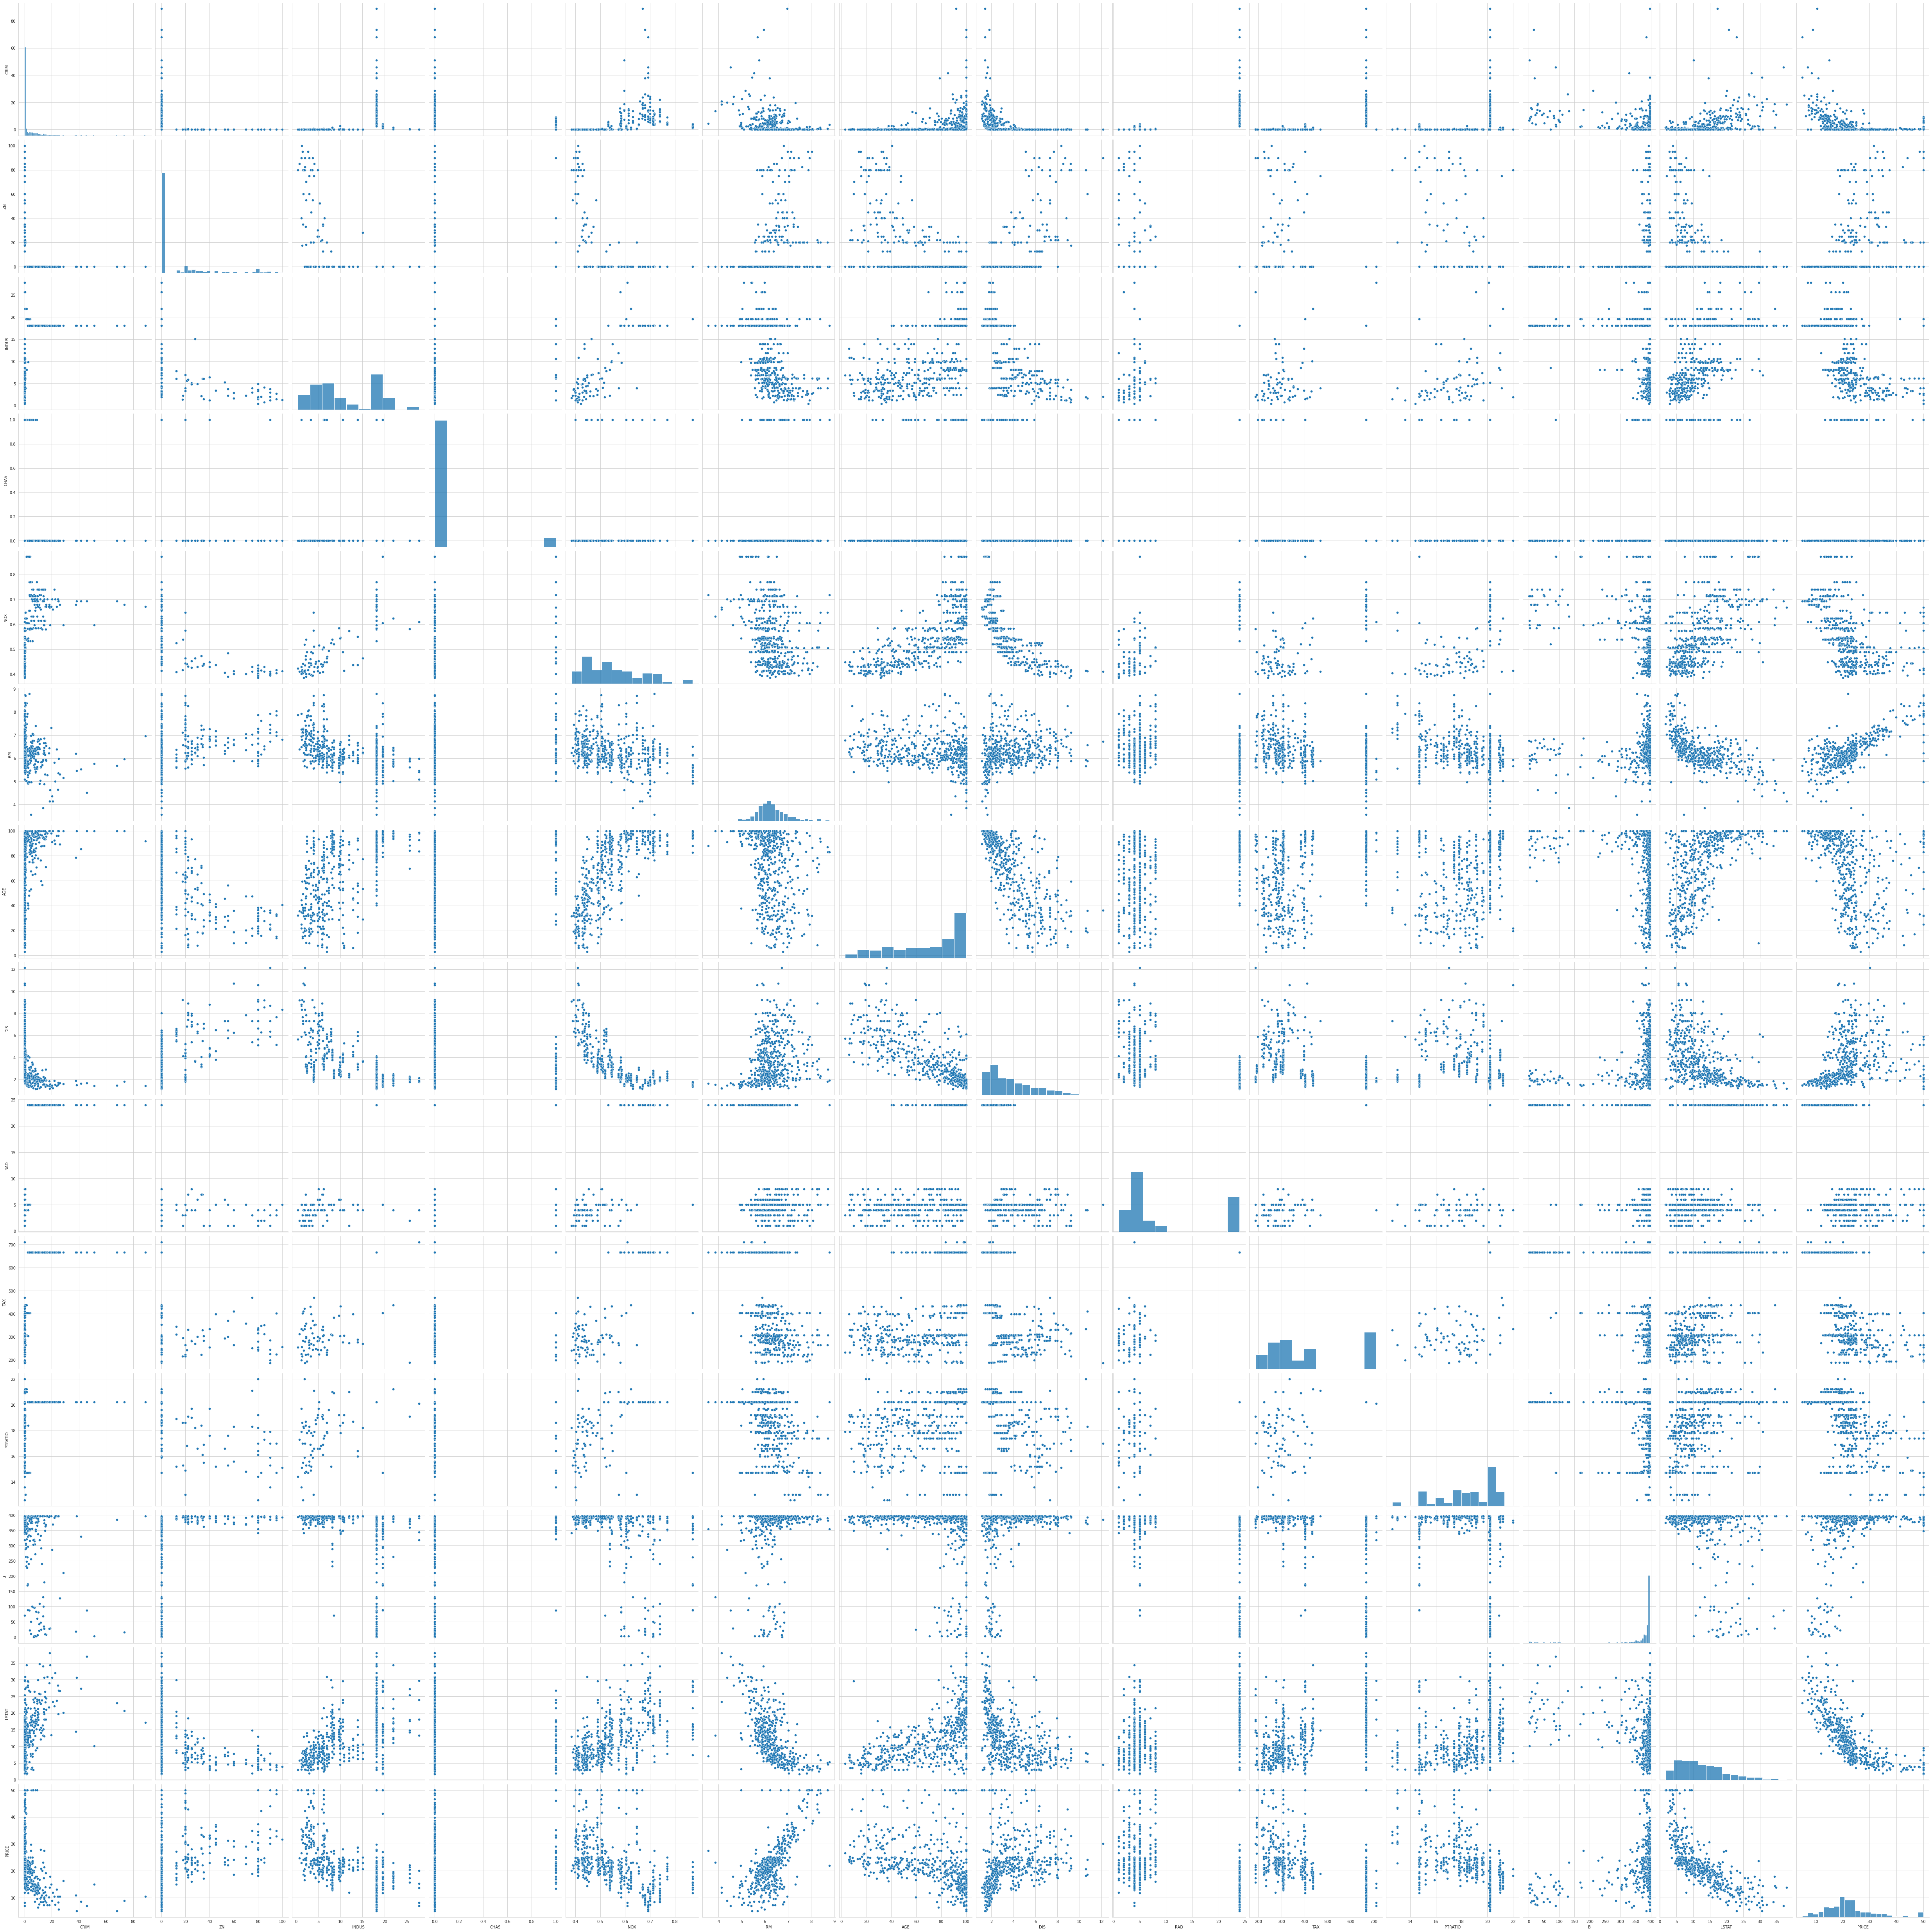

In [607]:
sns.pairplot(df, size=5)

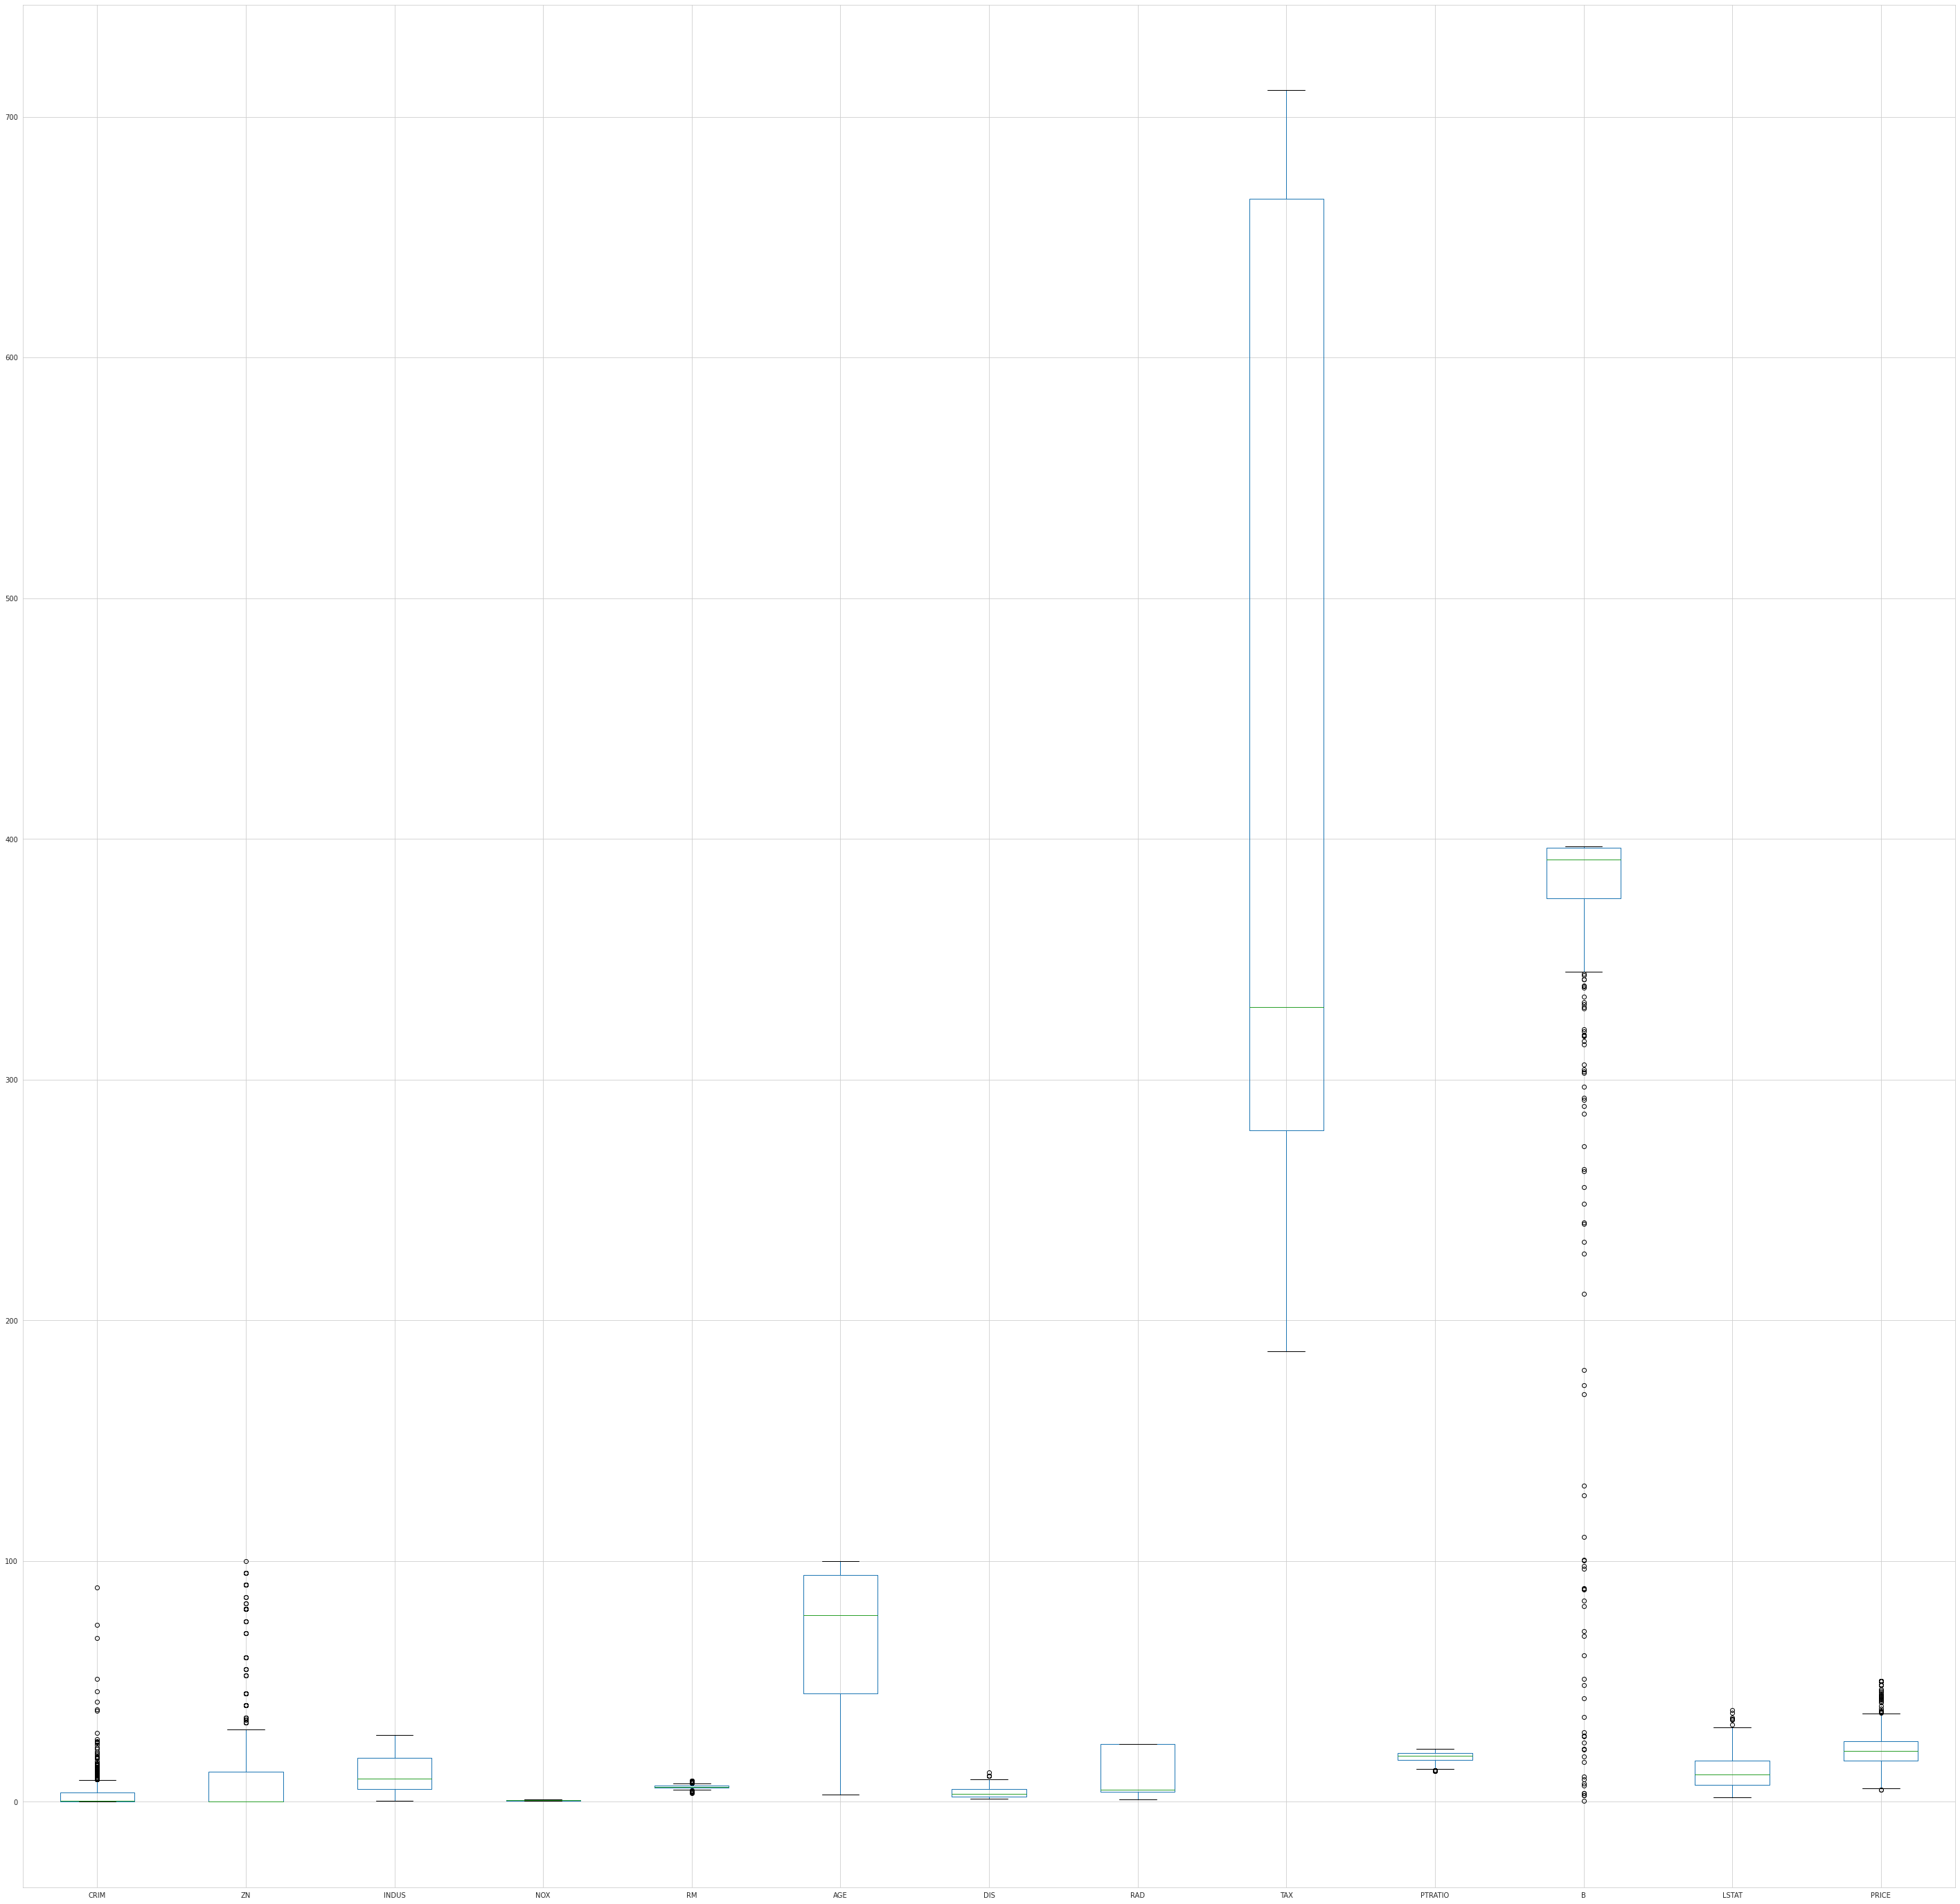

In [608]:
# Plot a Boxplot
plt.figure(figsize=(50,50))
df.boxplot()

In [609]:
sns.set_style("whitegrid")

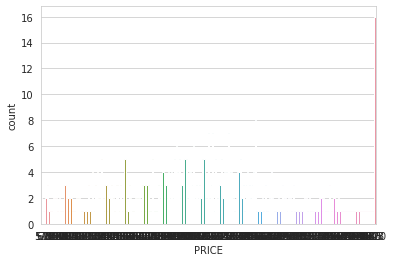

In [610]:
sns.countplot(data=df, x="PRICE")

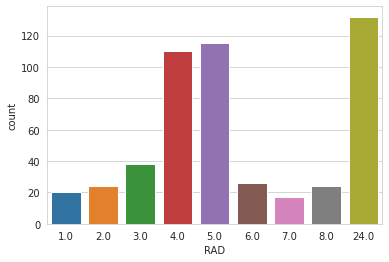

In [611]:
sns.countplot(data=df, x="RAD")

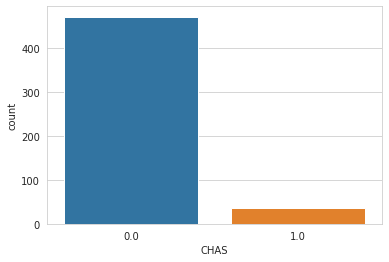

In [612]:
sns.countplot(data=df, x="CHAS")

In [613]:
# Minimum Price
df.PRICE.min()

5.0

In [614]:
# Maxmimum Price
df.PRICE.max()

50.0

In [615]:
# Standard Deviation
df.PRICE.std()

9.197104087379818

# Export the dataet

In [616]:
df.to_csv('boston_dataset.csv',)

# **Machine Learning - Linear Regression**

In [617]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [618]:
X = np.array(df.drop('PRICE', axis=1))
Y = np.array(df.PRICE)

# X = boston.data
# y = boston.target

# Splitting the data

In [619]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,
                                                    random_state=0)

In [620]:
len(X_train)

354

In [621]:
len(Y_train)

354

In [622]:
len(X_test)

152

In [623]:
len(Y_test)

152

# Choosing the model

In [624]:
model = LinearRegression()

## Fitting/Train the model

In [625]:
model.fit(X_train,Y_train)

LinearRegression()

In [626]:
# Intercept Value
model.intercept_

37.93710774183309

In [627]:
# Coefficient Value
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

## Prediction

In [628]:
Y_test

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5,
       13.6, 17.4,  8.4, 35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2,
       25. , 24.1, 16.6, 32.9, 36.2, 11. ,  7.2, 22

In [629]:
Y_pred = model.predict(X_test)

In [630]:
Y_pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

# Testing the model performance

In [631]:
model.score(X_test,Y_test)

0.6733825506400171

In [632]:
# R squared
r2_score(Y_test,Y_pred)

0.6733825506400171

In [633]:
# Adjusted R squared

In [634]:
# MSE
mean_squared_error(Y_test,Y_pred)

27.195965766883408

In [635]:
# MAE
mean_absolute_error(Y_test,Y_pred)

3.6099040603818096

In [636]:
# RMSE
np.sqrt(mean_squared_error(Y_test,Y_pred))

5.214975145375423

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

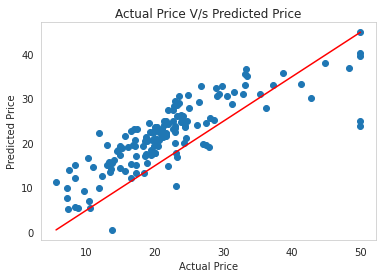

In [637]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.plot([min(Y_test),max(Y_test)],[min(Y_pred),max(Y_pred)], color='red')
plt.title('Actual Price V/s Predicted Price')

# Confusion Matrix

In [638]:
pd.crosstab(Y_test, Y_pred, rownames= ['Actual'], colnames= ['Predicted'])

Predicted,0.422755,5.175967,5.392821,5.441191,5.556626,6.861966,7.573699,9.270598,9.845791,9.930803,...,33.225682,35.091611,35.355828,35.632993,36.501247,36.870907,38.001541,39.440967,40.202707,44.817873
Actual,,,,,,,,,,,,,,,,,,,,,
5.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7.4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
42.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Accuracy

In [639]:
r2_score(Y_test,Y_pred)*100

67.3382550640017

# **Machine Learning - Decision Tree**

In [640]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

# Splitting the data

In [641]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=0)

In [642]:
len(X_train)

404

In [643]:
len(Y_train)

404

In [644]:
len(X_test)

102

In [645]:
len(Y_test)

102

# Choosing the model

In [646]:
regressor = DecisionTreeRegressor(max_depth = 6)

## Fitting/Train the model

In [647]:
DT_reg=regressor.fit(X_train, Y_train)

In [648]:
DT_reg

DecisionTreeRegressor(max_depth=6)

In [649]:
DT_reg.score(X_train, Y_train)

0.9539273064847269

In [650]:
DT_reg.score(X_test,Y_test)

0.6082596858219806

# Prediction

In [651]:
Y_pred=DT_reg.predict(X_test)

In [652]:
Y_pred

array([23.86923077, 19.96875   , 19.96875   , 13.945     , 21.51129032,
       21.51129032, 21.51129032, 21.51129032, 21.51129032, 16.1       ,
        8.345     , 17.55      , 13.945     ,  8.345     , 48.5       ,
       33.87      , 21.51129032, 33.87      , 25.6375    , 21.51129032,
       23.86923077, 19.96875   , 19.96875   , 23.86923077, 21.51129032,
       10.9       , 19.96875   , 15.3       , 40.75      , 18.45294118,
       13.945     , 19.96875   , 19.96875   , 21.51129032, 19.96875   ,
       19.96875   ,  8.345     , 19.96875   , 13.945     , 17.55      ,
       21.51129032, 21.51129032, 21.51129032, 13.945     , 22.        ,
       19.96875   , 19.63333333, 15.3       , 15.168     , 22.4       ,
       15.3       , 18.45294118, 21.51129032, 35.2       , 15.3       ,
       19.63333333, 21.51129032, 21.51129032, 10.9       , 19.63333333,
       23.86923077, 21.51129032, 33.87      , 25.6375    , 21.51129032,
       25.6375    , 18.45294118, 22.36      , 16.13333333, 21.51

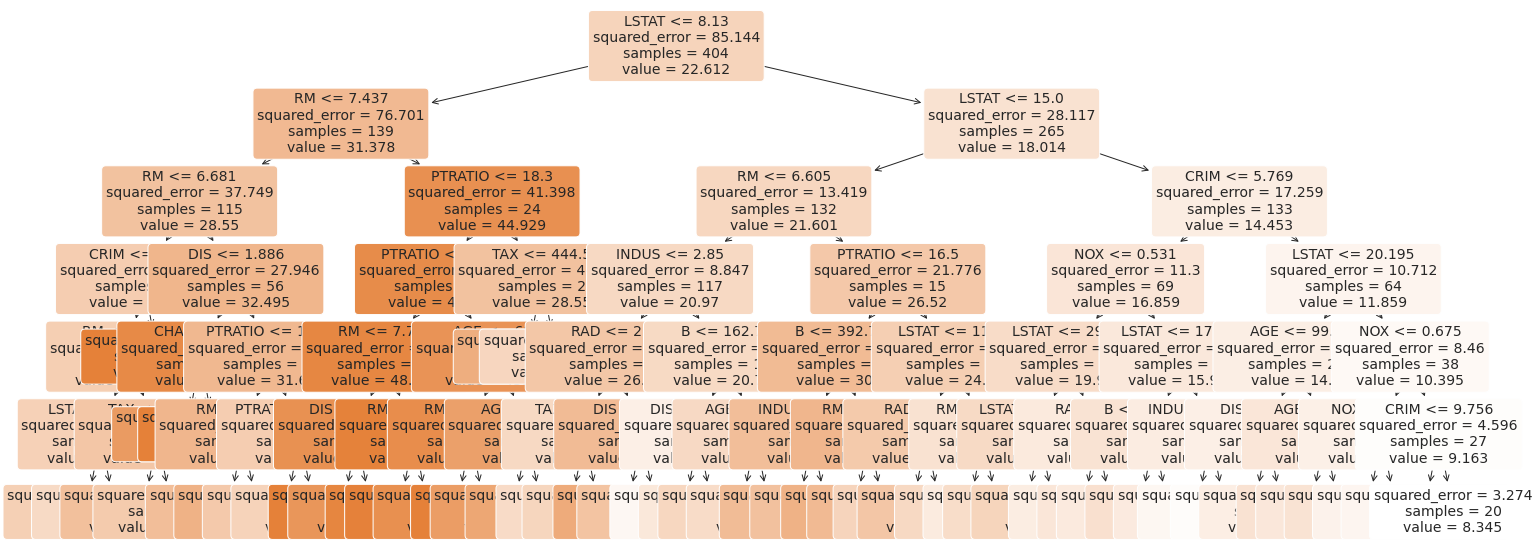

In [653]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor,
              feature_names=X.columns,
              class_names=Y,
              filled=True,
              rounded=True,
              fontsize=14)

# Testing the model performance

In [654]:
DT_reg.score(X_test,Y_test)

0.6082596858219806

In [655]:
# R squared
r2_score(Y_test,Y_pred)

0.6082596858219806

In [656]:
# Adjusted R squared

In [657]:
# MSE
mean_squared_error(Y_test,Y_pred)

31.89880230113413

In [658]:
# MAE
mean_absolute_error(Y_test,Y_pred)

3.3552127111828525

In [659]:
# RMSE
np.sqrt(mean_squared_error(Y_test,Y_pred))

5.64790246915916

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

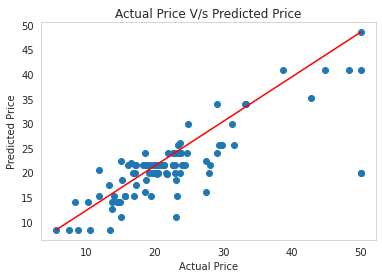

In [660]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.plot([min(Y_test),max(Y_test)],[min(Y_pred),max(Y_pred)], color='red')
plt.title('Actual Price V/s Predicted Price')

# Confusion Matrix

In [661]:
pd.crosstab(Y_test, Y_pred, rownames= ['Actual'], colnames= ['Predicted'])

Predicted,8.345000,10.900000,12.500000,13.945000,15.168000,15.300000,16.100000,16.133333,17.550000,18.452941,...,22.360000,22.400000,23.869231,25.637500,26.033333,29.905556,33.870000,35.200000,40.750000,48.500000
Actual,,,,,,,,,,,,,,,,,,,,,
5.6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Accuracy

In [662]:
r2_score(Y_test,Y_pred)*100

60.825968582198065

# **Machine Learning - Random Forest**

# Choosing the model

In [663]:
regressor_rf = RandomForestRegressor(n_estimators=500, random_state = 0)

## Fitting/Train the model

In [664]:
regressor_rf.fit(X_train, Y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [665]:
RF_reg=regressor_rf.fit(X_train, Y_train)

In [666]:
RF_reg

RandomForestRegressor(n_estimators=500, random_state=0)

In [667]:
RF_reg.score(X_train, Y_train)

0.9836689200317739

In [668]:
RF_reg.score(X_test,Y_test)

0.7759283509520536

# Prediction

In [669]:
Y_pred=RF_reg.predict(X_test)

In [670]:
Y_pred

array([24.0408, 29.1876, 22.0214, 11.0758, 20.8378, 20.6604, 21.2674,
       20.1122, 20.3398, 18.8502,  8.3864, 14.9152, 15.0602,  8.525 ,
       46.785 , 33.9496, 21.1202, 34.633 , 25.6128, 21.0088, 23.7166,
       21.7858, 19.778 , 24.549 , 20.1744, 18.0434, 18.5216, 16.1536,
       43.81  , 19.3098, 14.9276, 17.5944, 20.0552, 21.5106, 22.9232,
       17.9292,  8.6672, 28.9834, 14.549 , 15.4174, 22.8636, 20.8928,
       22.5818, 15.2146, 23.9016, 22.5468, 21.2068, 16.5274, 14.4794,
       25.1836, 16.3542, 19.7402, 22.0788, 39.9542, 15.0938, 21.1324,
       19.6164, 19.0608, 23.3202, 20.0488, 21.6448, 21.6016, 33.1402,
       27.8426, 18.544 , 27.075 , 16.092 , 21.392 , 17.3786, 22.054 ,
       19.9794, 22.8316, 24.3766, 30.8254, 29.8854,  8.7272, 42.8726,
       22.5696, 22.8778, 20.2144, 26.4968, 18.1318, 23.7426, 42.6914,
       41.9654, 24.3726, 23.009 , 15.1238, 26.5232, 16.1592, 19.3346,
       12.0624, 22.5008, 29.7582, 21.059 , 21.7198, 11.3814, 23.4044,
       14.8404, 19.0

# Testing the model performance

In [671]:
DT_reg.score(X_test,Y_test)

0.6082596858219806

In [672]:
# R squared
r2_score(Y_test,Y_pred)

0.7759283509520536

In [673]:
# Adjusted R squared

In [674]:
# MSE
mean_squared_error(Y_test,Y_pred)

18.245804619999983

In [675]:
# MAE
mean_absolute_error(Y_test,Y_pred)

2.64607647058823

In [676]:
# RMSE
np.sqrt(mean_squared_error(Y_test,Y_pred))

4.2715108123473104

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

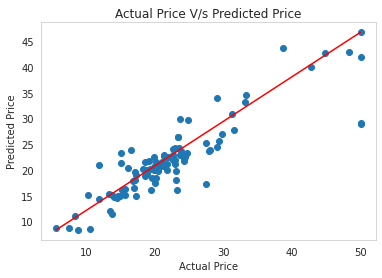

In [677]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.plot([min(Y_test),max(Y_test)],[min(Y_pred),max(Y_pred)], color='red')
plt.title('Actual Price V/s Predicted Price')

# Confusion Matrix

In [678]:
pd.crosstab(Y_test, Y_pred, rownames= ['Actual'], colnames= ['Predicted'])

Predicted,8.3864,8.5250,8.6672,8.7272,11.0758,11.3814,12.0624,14.4794,14.5490,14.8404,...,30.8254,33.1402,33.9496,34.6330,39.9542,41.9654,42.6914,42.8726,43.8100,46.7850
Actual,,,,,,,,,,,,,,,,,,,,,
5.6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
44.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Accuracy

In [679]:
r2_score(Y_test,Y_pred)*100

77.59283509520536